In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
from time import sleep
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


import cv2
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tensorflow.keras.utils import load_img, img_to_array
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop


In [ ]:
!unzip /content/images.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [ ]:
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=12d2f51e8fc882143019c48ac9153c22dc9cd34bd6b756973fc61d0660b55ad3
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.3 MB/s eta 0:00:00


In [ ]:
picture_size = 48
folder_path = '/content/images'

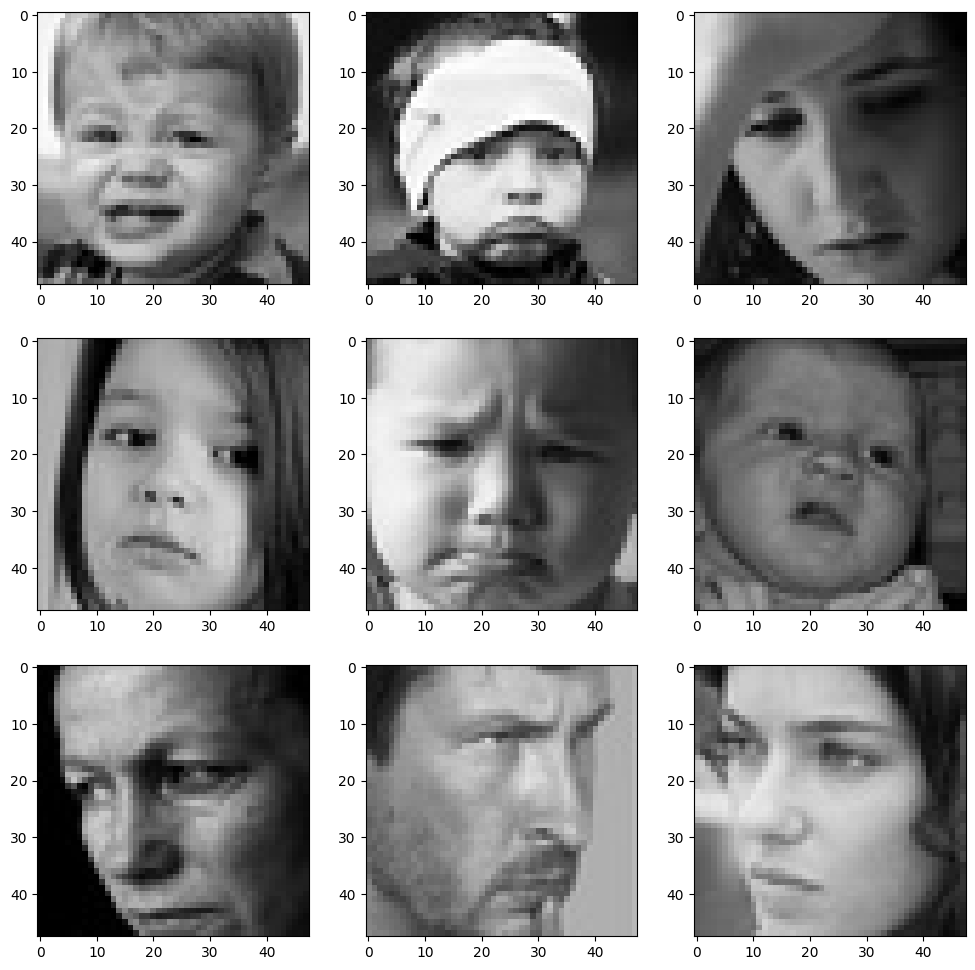

In [ ]:
expression = 'sad'
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/train/"+expression+"/"+
                  os.listdir(folder_path + "/train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

In [ ]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"/train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"/validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


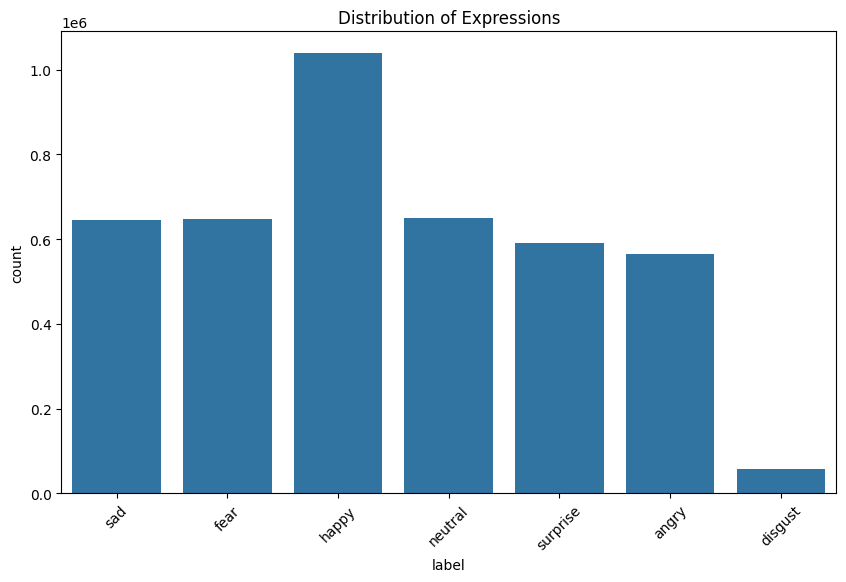

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array

# Function to load images from a specific directory
def load_images_from_directory(directory, picture_size=48):
    images = []
    labels = []

    for expression in os.listdir(directory):
        expression_path = os.path.join(directory, expression)
        if os.path.isdir(expression_path):
            for image_file in os.listdir(expression_path):
                if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
                    img_path = os.path.join(expression_path, image_file)
                    try:
                        img = load_img(img_path, target_size=(picture_size, picture_size), color_mode="grayscale")
                        img_array = img_to_array(img)
                        flat_img_array = img_array.flatten()
                        images.append(flat_img_array)
                        labels.append(expression)
                    except Exception as e:
                        print(f"Error loading image: {img_path}. Error: {e}")

    return np.array(images), np.array(labels)

# Function to load images from both train and validation directories
def load_dataset(folder_path, picture_size=48):
    train_images, train_labels = load_images_from_directory(os.path.join(folder_path, 'train'), picture_size)
    validation_images, validation_labels = load_images_from_directory(os.path.join(folder_path, 'validation'), picture_size)

    return np.concatenate((train_images, validation_images)), np.concatenate((train_labels, validation_labels))

# Load images
folder_path = "/content/images"
images, labels = load_dataset(folder_path)

if len(images) > 0 and len(labels) > 0:
    image_df = pd.DataFrame(images)
    image_df['label'] = labels

    plt.figure(figsize=(10, 6))
    sns.countplot(x='label', data=image_df)
    plt.title("Distribution of Expressions")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No images or labels were loaded. Check the file paths and directory structure.")

Cumulative explained variation for 50 principal components: 0.8438129425048828
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 35887 samples in 0.004s...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 35887 samples in 13.360s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35887
[t-SNE] Computed conditional probabilities for sample 2000 / 35887
[t-SNE] Computed conditional probabilities for sample 3000 / 35887
[t-SNE] Computed conditional probabilities for sample 4000 / 35887
[t-SNE] Computed conditional probabilities for sample 5000 / 35887
[t-SNE] Computed conditional probabilities for sample 6000 / 35887
[t-SNE] Computed conditional probabilities for sample 7000 / 35887
[t-SNE] Computed conditional probabilities for sample 8000 / 35887
[t-SNE] Computed conditional probabilities for sample 9000 / 35887
[t-SNE] Computed conditional probabilities for sample 10000 / 35887
[t-SNE] Computed conditional probabilities for sample 11000 / 35887
[t-SNE] Computed conditional probabilities for sample 12000 / 35887
[t-SNE] Computed conditional probabilities for sample 13000 / 35887
[t-SNE] Computed conditional probabilities for sample 14000 / 3588

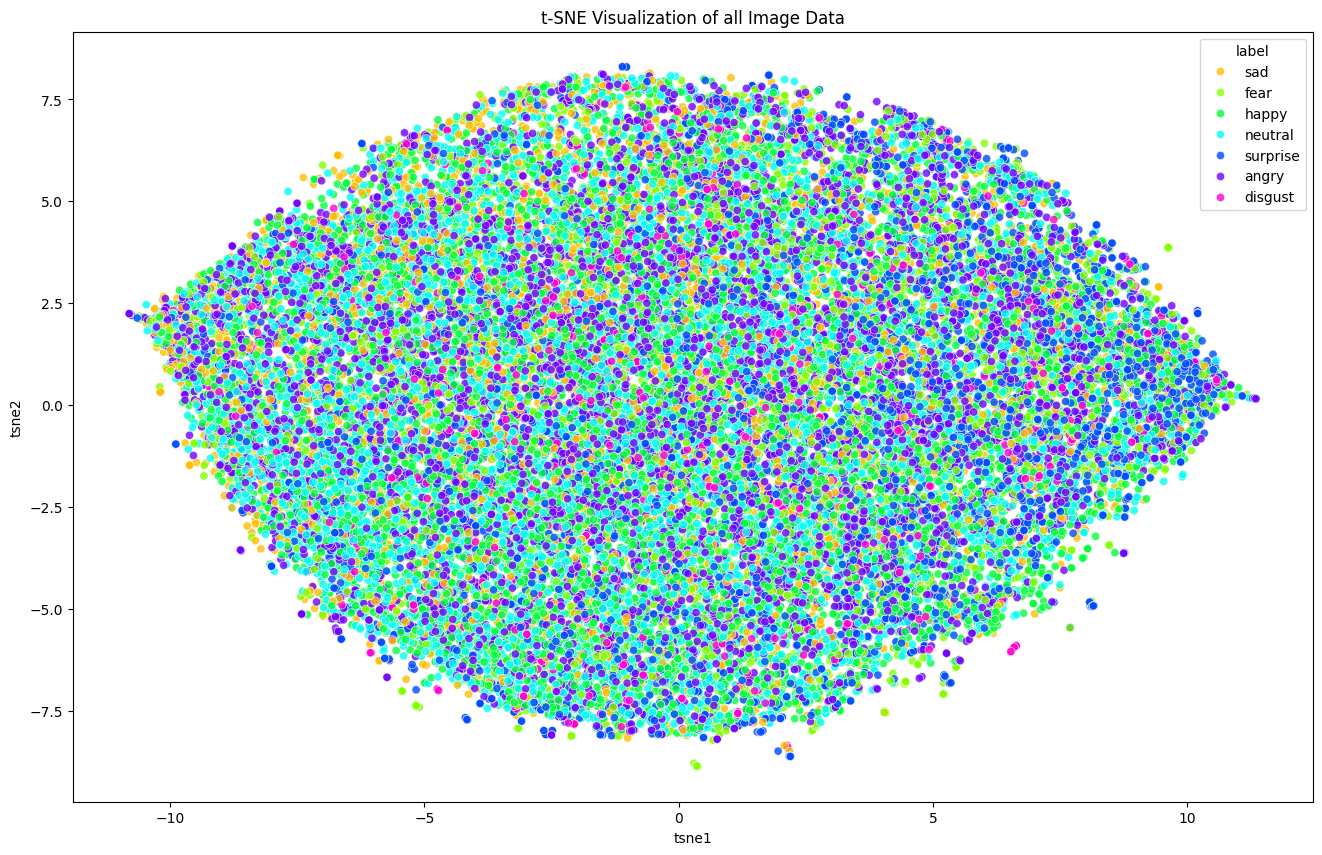

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# We will use PCA to reduce the dimensionality before t-SNE for better performance
pca = PCA(n_components=50)  # Take the first 50 principal components
pca_result = pca.fit_transform(images)
print(f'Cumulative explained variation for 50 principal components: {np.sum(pca.explained_variance_ratio_)}')

# Now perform t-SNE on the PCA-reduced data
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
tsne_df['label'] = labels  # make sure labels is a list/array of expression labels for all images

# Plot the t-SNE results with labels for hue
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="label",
    palette=sns.color_palette("hsv", len(set(labels))),
    data=tsne_df,
    legend="full",
    alpha=0.8
)

plt.title('t-SNE Visualization of all Image Data')
plt.show()


Cumulative explained variation for 50 principal components: 0.8438068628311157
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 35887 samples in 0.008s...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 35887 samples in 13.590s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35887
[t-SNE] Computed conditional probabilities for sample 2000 / 35887
[t-SNE] Computed conditional probabilities for sample 3000 / 35887
[t-SNE] Computed conditional probabilities for sample 4000 / 35887
[t-SNE] Computed conditional probabilities for sample 5000 / 35887
[t-SNE] Computed conditional probabilities for sample 6000 / 35887
[t-SNE] Computed conditional probabilities for sample 7000 / 35887
[t-SNE] Computed conditional probabilities for sample 8000 / 35887
[t-SNE] Computed conditional probabilities for sample 9000 / 35887
[t-SNE] Computed conditional probabilities for sample 10000 / 35887
[t-SNE] Computed conditional probabilities for sample 11000 / 35887
[t-SNE] Computed conditional probabilities for sample 12000 / 35887
[t-SNE] Computed conditional probabilities for sample 13000 / 35887
[t-SNE] Computed conditional probabilities for sample 14000 / 3588

<ipython-input-19-b6a716d8b430>:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(tsne_df.loc[indices, 'tsne1'], tsne_df.loc[indices, 'tsne2'], tsne_df.loc[indices, 'tsne3'],


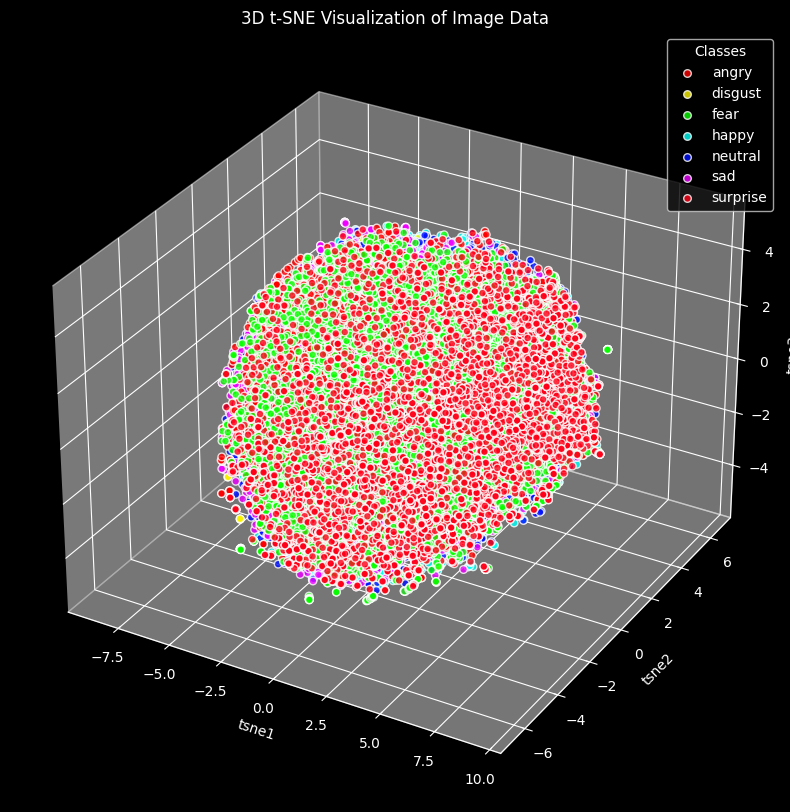

In [ ]:
plt.style.use('dark_background')
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Assuming 'images' is your array of flattened images and 'labels' is the array of corresponding expressions

# We will use PCA to reduce the dimensionality before t-SNE for better performance
pca = PCA(n_components=50)  # Take the first 50 principal components
pca_result = pca.fit_transform(images)
print(f'Cumulative explained variation for 50 principal components: {np.sum(pca.explained_variance_ratio_)}')

# Now perform t-SNE on the PCA-reduced data
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)  # Use n_components=3 for 3D
tsne_results = tsne.fit_transform(pca_result)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2', 'tsne3'])
tsne_df['label'] = labels  # make sure labels is a list/array of expression labels for all images

# Create a figure and a 3D Axes
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Color map
unique_labels = np.unique(labels)
colors = plt.cm.hsv(np.linspace(0, 1, len(unique_labels)))

# Plot each label as a separate scatter plot
for label, col in zip(unique_labels, colors):
    indices = tsne_df['label'] == label
    ax.scatter(tsne_df.loc[indices, 'tsne1'], tsne_df.loc[indices, 'tsne2'], tsne_df.loc[indices, 'tsne3'],
               c=col, label=label, alpha=0.8, edgecolors='w', s=30)

# Add labels and title
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.set_zlabel('tsne3')
plt.title('3D t-SNE Visualization of Image Data')

# Legend
ax.legend(title='Classes')

plt.show()


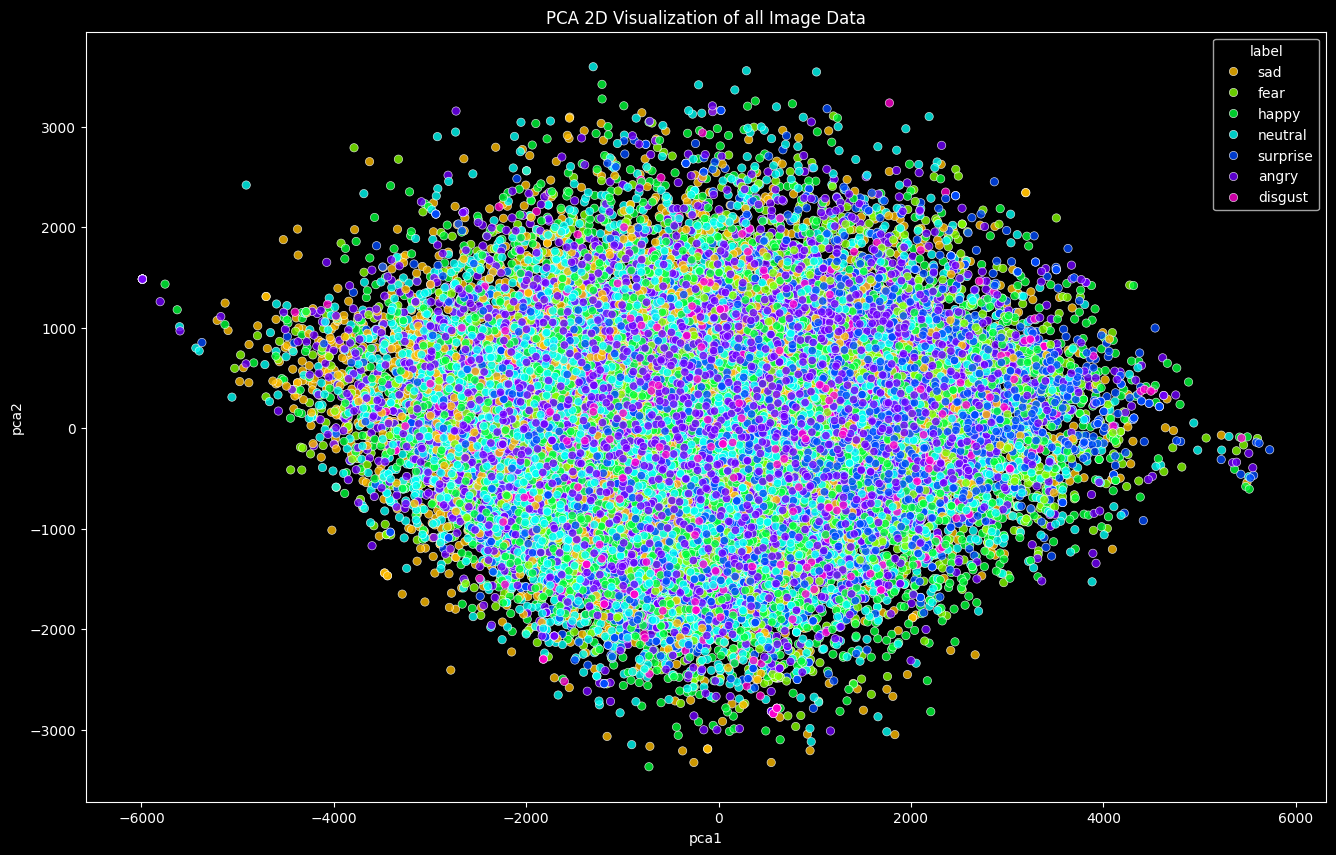

In [ ]:
pca_df = pd.DataFrame(pca_result[:, :2], columns=['pca1', 'pca2'])
pca_df['label'] = labels  # Ensure this is the array of expression labels

# Plot the PCA results
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca1", y="pca2",
    hue="label",
    palette=sns.color_palette("hsv", len(np.unique(labels))),
    data=pca_df,
    legend="full",
    alpha=0.8
)
plt.title('PCA 2D Visualization of all Image Data')
plt.show()

Cumulative explained variation for 3 principal components: 0.4811290502548218


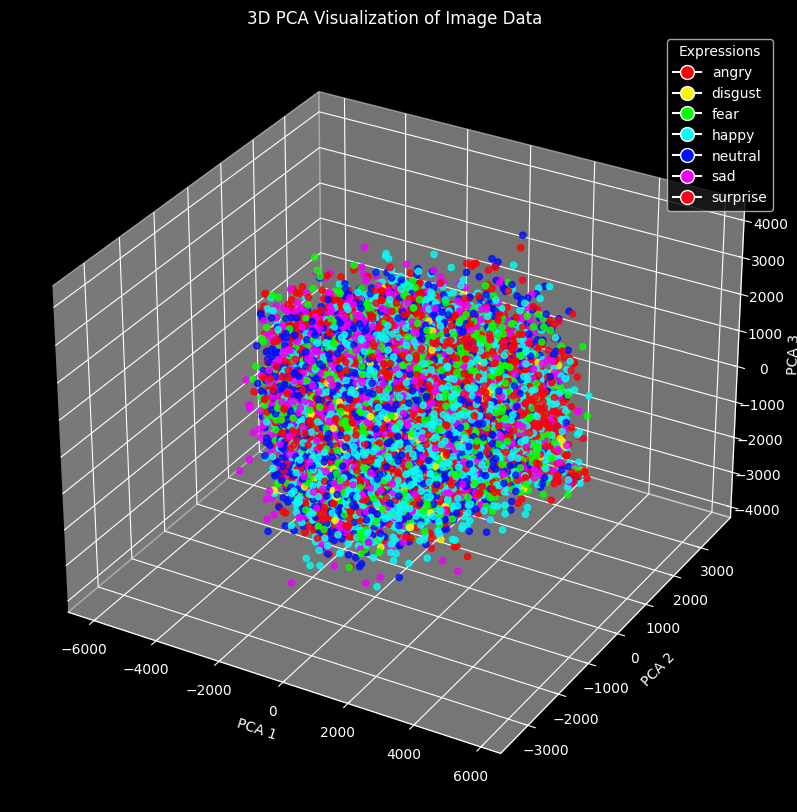

In [ ]:
plt.style.use('dark_background')

from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 3 components
pca = PCA(n_components=3)
pca_result_3d = pca.fit_transform(images)  # Assuming 'images' is your array of flattened images

# Explained variance can help understand how much information is compressed into the components
print(f'Cumulative explained variation for 3 principal components: {np.sum(pca.explained_variance_ratio_)}')

# Create a DataFrame for the PCA results with 3 components
pca_df_3d = pd.DataFrame(pca_result_3d, columns=['pca1', 'pca2', 'pca3'])
pca_df_3d['label'] = labels  # Ensure this is the array of expression labels

# Create a figure for 3D plotting
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the 3 PCA components
scatter = ax.scatter(
    pca_df_3d['pca1'], pca_df_3d['pca2'], pca_df_3d['pca3'],
    c=pd.Categorical(pca_df_3d['label']).codes,  # Encode labels with numbers for color mapping
    cmap='hsv',  # Colormap used for different labels
    alpha=0.8
)

# Create a legend with the unique labels
unique_labels = np.unique(labels)
# Create a color map from the unique labels
color_map = {label: color for label, color in zip(unique_labels, scatter.cmap(np.linspace(0, 1, len(unique_labels))))}
# Create custom legend entries
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                              markerfacecolor=color_map[label], markersize=10)
                   for label in unique_labels]
# Add the custom legend
ax.legend(handles=legend_elements, title='Expressions')

# Set labels for axes
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Set title
plt.title('3D PCA Visualization of Image Data')

# Show plot
plt.show()

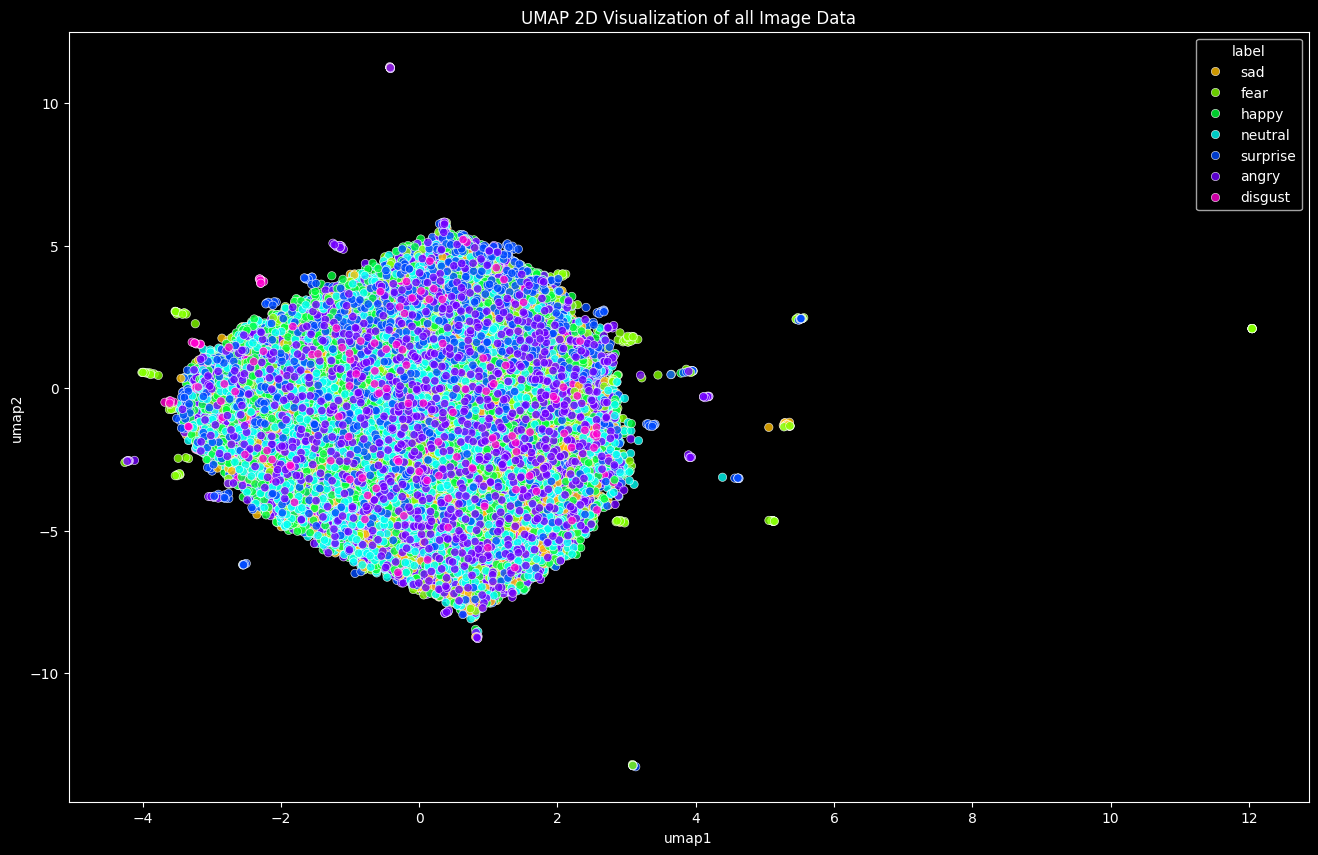

In [ ]:
plt.style.use('dark_background')

import umap.umap_ as umap
from umap.umap_ import UMAP
from sklearn.preprocessing import StandardScaler

# We will use the scaled images as input for UMAP
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images)

# Perform UMAP
umap_model = UMAP(n_components=2, n_neighbors=50, min_dist=0.3, metric='euclidean')
umap_results = umap_model.fit_transform(images_scaled)

# Create a DataFrame for the UMAP results
umap_df = pd.DataFrame(umap_results, columns=['umap1', 'umap2'])
umap_df['label'] = labels  # Ensure this is the array of expression labels

# Plot the UMAP results with labels for hue
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap1", y="umap2",
    hue="label",
    palette=sns.color_palette("hsv", len(np.unique(labels))),
    data=umap_df,
    legend="full",
    alpha=0.8
)
plt.title('UMAP 2D Visualization of all Image Data')
plt.show()


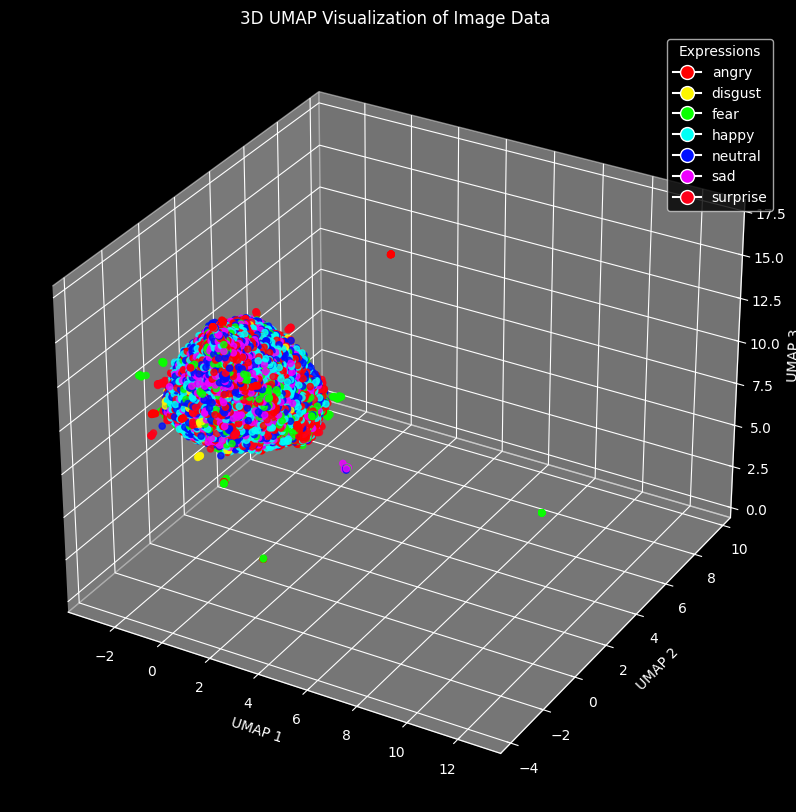

In [ ]:
import umap.umap_ as umap
from umap.umap_ import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'images' is your array of flattened images and 'labels' is the array of corresponding expressions

# We will use the scaled images as input for UMAP
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images)

# Perform UMAP with 3 components for 3D visualization
umap_model = UMAP(n_components=3, n_neighbors=50, min_dist=0.3, metric='euclidean')
umap_results_3d = umap_model.fit_transform(images_scaled)

# Create a DataFrame for the UMAP results with 3 components
umap_df_3d = pd.DataFrame(umap_results_3d, columns=['umap1', 'umap2', 'umap3'])
umap_df_3d['label'] = labels  # Ensure this is the array of expression labels

# Create a figure for 3D plotting
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# 3D Scatter plot for UMAP results
scatter = ax.scatter(
    umap_df_3d['umap1'], umap_df_3d['umap2'], umap_df_3d['umap3'],
    c=pd.Categorical(umap_df_3d['label']).codes,  # Encode labels with numbers for color mapping
    cmap='hsv',  # Colormap used for different labels
    alpha=0.8
)

# Create a legend with the unique labels
unique_labels = np.unique(labels)
# Create a color map from the unique labels
color_map = {label: color for label, color in zip(unique_labels, scatter.cmap(np.linspace(0, 1, len(unique_labels))))}
# Create custom legend entries
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                              markerfacecolor=color_map[label], markersize=10)
                   for label in unique_labels]
# Add the custom legend
ax.legend(handles=legend_elements, title='Expressions')

# Set labels for axes
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('UMAP 3')

# Set title
plt.title('3D UMAP Visualization of Image Data')

# Show plot
plt.show()


In [ ]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [ ]:
checkpoint = ModelCheckpoint("./model.h5.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint]



epochs = 48

history = model.fit(
    train_set,
    steps_per_epoch=train_set.n // train_set.batch_size,
    epochs=48,
    validation_data=test_set,
    validation_steps=test_set.n // test_set.batch_size
)



Epoch 1/48


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 42s 104ms/step - accuracy: 0.2089 - loss: 2.1238 - val_accuracy: 0.3105 - val_loss: 1.7167
Epoch 2/48
  1/225 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.3203 - loss: 1.7937

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3203 - loss: 1.7937 - val_accuracy: 0.1923 - val_loss: 2.1887
Epoch 3/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - accuracy: 0.2818 - loss: 1.8629 - val_accuracy: 0.3223 - val_loss: 1.7163
Epoch 4/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 93us/step - accuracy: 0.2734 - loss: 1.8014 - val_accuracy: 0.1538 - val_loss: 2.4541
Epoch 5/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.3296 - loss: 1.7347 - val_accuracy: 0.3409 - val_loss: 1.7270
Epoch 6/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 86us/step - accuracy: 0.3281 - loss: 1.6755 - val_accuracy: 0.3077 - val_loss: 2.6956
Epoch 7/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.3647 - loss: 1.6516 - val_accuracy: 0.3815 - val_loss: 1.6537
Epoch 8/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 94us/step - accuracy: 0.3438 - loss: 1.7185 - val_accuracy: 0.5000 - val_loss: 1.9623
Epoch 9/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.3894 - loss: 1.5920 - val_accuracy: 0.

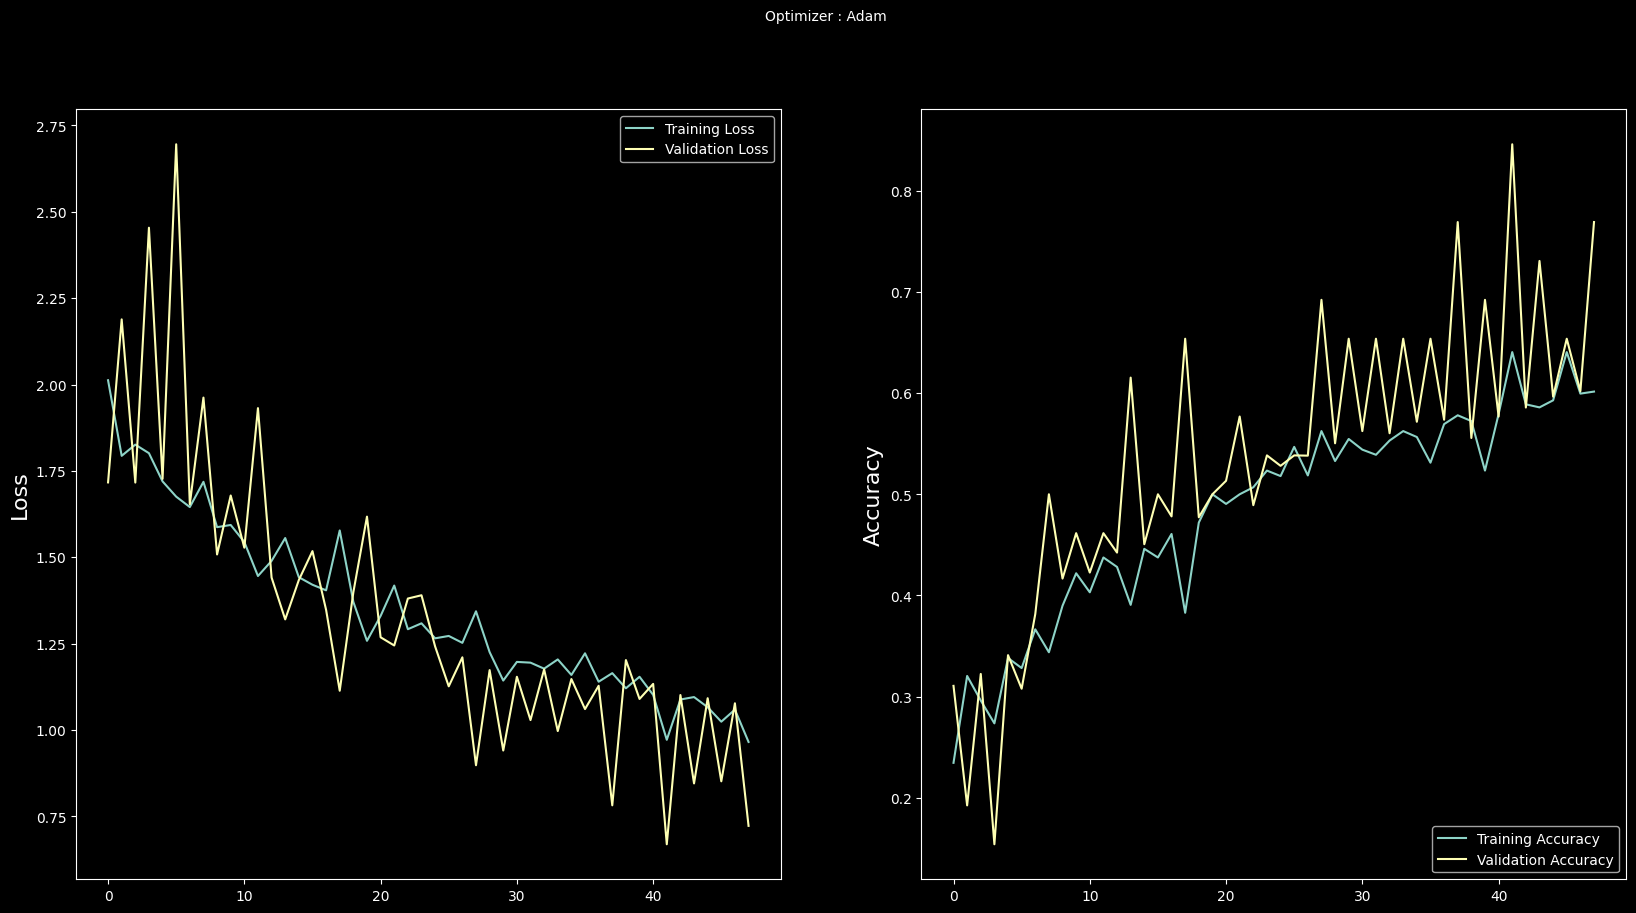

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import cv2
image = cv2.imread('/content/OIP.jpg')

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
roi_gray = cv2.resize(gray, (48, 48), interpolation=cv2.INTER_AREA)

In [ ]:
roi = roi_gray.astype('float') / 255.0

In [ ]:
roi = roi.reshape(1, 48, 48, 1)

In [ ]:
prediction = model.predict(roi)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [ ]:
print(prediction)

[0.27195594 0.00865205 0.11522882 0.11620151 0.1224444  0.2667895
 0.09872779]


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Predict the probabilities for each class
predictions = model.predict(validation_images)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)  # Predicted classes
# true_labels = np.argmax(validation_labels, axis=1)  # True classes (if one-hot encoded)


221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
  def load_images_from_directory(directory, picture_size=48):
    images = []
    labels = []

    for expression in os.listdir(directory):
        expression_path = os.path.join(directory, expression)
        if os.path.isdir(expression_path):
            for image_file in os.listdir(expression_path):
                if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
                    img_path = os.path.join(expression_path, image_file)
                    try:
                        img = load_img(img_path, target_size=(picture_size, picture_size), color_mode="grayscale")
                        img_array = img_to_array(img)
                        images.append(img_array)
                        labels.append(expression)
                    except Exception as e:
                        print(f"Error loading image: {img_path}. Error: {e}")

    return np.array(images), np.array(labels)

def load_validation_data(folder_path, picture_size=48):
    validation_images, validation_labels = load_images_from_directory(
        os.path.join(folder_path, 'validation'),
        picture_size
    )
    return validation_images, validation_labels

In [ ]:
folder_path = "/content/images/"
picture_size = 48

validation_images, validation_labels = load_validation_data(folder_path, picture_size)

print(f"Validation Images Shape: {validation_images.shape}")
print(f"Validation Labels Shape: {validation_labels.shape}")

Validation Images Shape: (7066, 48, 48, 1)
Validation Labels Shape: (7066,)


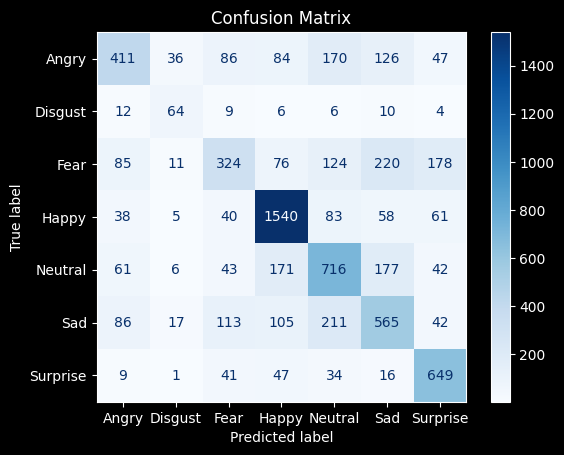

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(validation_labels, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print(f"true_labels type: {type(true_labels)}, shape: {np.shape(true_labels)}")
print(f"predicted_labels type: {type(predicted_labels)}, shape: {np.shape(predicted_labels)}")


true_labels type: <class 'numpy.int64'>, shape: ()
predicted_labels type: <class 'numpy.ndarray'>, shape: (7066,)


In [ ]:
print(max(predicted_labels))

6


In [ ]:
label_to_index = {label: index for index, label in enumerate(emotion_labels)}
true_labels = np.array([label_to_index[label] for label in validation_labels])


NameError: name 'emotion_labels' is not defined

NameError: name 'emotion_labels' is not defined

In [ ]:
emotion_labels = {'Angry' : 0, 'Disgust' : 1, 'Fear' : 2, 'Happy' : 3, 'Neutral' : 4, 'Sad' : 5, 'Surprise' : 6}

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Example array of strings
emotions = validation_labels

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the emotions array
validation_labels = encoder.fit_transform(emotions)
print(validation_labels)  # Output: [0 1 2 3 1]

[5 5 5 ... 1 1 1]
